In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [ ]:
df['Label'] = df['ngay_mo_date'].notna().astype(int)

Ta có 2 tiêu chí drop theo hàng:

- Nếu không đủ thông tin để mô tả hay phán đoán một mẫu (missing trên 80% số cột)
- Giá trị lợi nhuận nhỏ hơn 20% tổng giá trị lợi nhuận chung (phân phối)

In [ ]:
import pandas as pd

arpu_columns = ['apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5']
data_columns = ['data_1', 'data_2', 'data_3', 'data_4','data_5']
call_columns = ['call_1', 'call_2', 'call_3', 'call_4','call_5']

df['total_arpu'] = df[arpu_columns].sum(axis=1, skipna=True)
df['total_data'] = df[data_columns].sum(axis=1, skipna=True)
df['total_call'] = df[call_columns].sum(axis=1, skipna=True)

threshold = 0.8
columns_to_check = arpu_columns + data_columns + call_columns
total_columns = len(columns_to_check)
threshold_value = threshold * total_columns

def missing_value_count(row):
    return row[columns_to_check].isnull().sum()

df['missing_count'] = df.apply(missing_value_count, axis=1)

rows_below_threshold = df[df['missing_count'] <= threshold_value]
rows_above_threshold = df[df['missing_count'] > threshold_value]

arpu_20_percentile = rows_below_threshold['total_arpu'].quantile(0.20)

final_df = rows_below_threshold[rows_below_threshold['total_arpu'] >= arpu_20_percentile]
dropped_due_to_arpu = rows_below_threshold[rows_below_threshold['total_arpu'] < arpu_20_percentile]

dropped_samples = pd.concat([rows_above_threshold, dropped_due_to_arpu])

final_df = final_df.drop(columns=['missing_count'])
dropped_samples = dropped_samples.drop(columns=['missing_count'])

In [5]:
value_counts = final_df['sdt_mahoa'].value_counts()
values_appearing_more_than_once = value_counts[value_counts > 1]
values_appearing_more_than_once = values_appearing_more_than_once.index.tolist()

filtered_df = final_df[final_df['sdt_mahoa'].isin(values_appearing_more_than_once)]
filtered_df

,sdt_mahoa,ngay_khoa,ngay_mo_date,ngay_mo_khoa,ngay_nap_tien_gan_nhat,apru_1,apru_2,apru_3,apru_4,apru_5,...,data_4,data_5,ngay_goi_tong_dai_gan_nhat,da_tung_dang_ky_goi,ngay_dang_ky_goi_gan_nhat,danh_sach_goi_dang_ky,Label,total_arpu,total_data,total_call
98,dd92fb40ce43ecb6f0d7bdccb4e0e95c806a5ff7,9/29/2021,NaN,NaN,NaN,352699.402,356996.002,355596.802,362612.602,381227.902,...,6.764981,7.166958,NaN,yes,151.0,MI_MAXKM_4GBN,0,1809132.710,50.047481,891.0
194,5d11495c952530f87b40ac1a8a8b46e9e7692821,9/30/2021,10/1/2021,1.0,NaN,160656.100,181125.673,173941.900,225112.800,458836.400,...,10.066581,20.304629,NaN,yes,240.0,MI_MAX100N,1,1199672.873,65.164911,267.0
208,cedb156d8700c39bd37ee018ae416e3dd7d70daa,9/30/2021,NaN,NaN,NaN,255396.900,194803.015,246734.400,294477.700,253145.200,...,0.000000,0.000000,10.0,no,NaN,NaN,0,1244557.215,0.000000,175.0
216,e350594bf0671545889bb3789475609658ab7803,9/30/2021,NaN,NaN,NaN,89349.700,126265.600,117346.900,93547.300,90399.100,...,0.050899,0.109124,NaN,yes,621.0,MI_BIGKM_2GBN,0,516908.600,7.759479,181.0
259,de1d041f9c34a903865227fe876abb72abf03470,9/23/2021,9/24/2021,1.0,NaN,362371.400,295156.500,251703.300,227947.300,221327.100,...,0.000000,0.000000,5.0,no,NaN,NaN,1,1358505.600,0.000000,1220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336657,c7a786481e7af46246f8dde8f3dd1e36bdfb873b,9/11/2021,9/15/2021,4.0,NaN,151808.800,148109.795,159655.100,165246.400,439908.700,...,0.000000,1.700331,NaN,no,NaN,NaN,1,1064728.795,1.725941,571.0
336663,bec436c5a3331e562d9b5e4216772275e7f5baa6,9/23/2021,9/24/2021,1.0,NaN,713623.702,360585.002,371292.702,370099.202,371246.502,...,8.506808,4.088052,NaN,yes,145.0,MI_MAXKM_4GBN,1,2186847.110,19.480582,797.0
336682,b3a8109d5ba89324efdc398214d9aeca1fe8447d,9/23/2021,NaN,NaN,NaN,3418.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,33.0,MI_BUM360,0,3418.000,0.002804,8.0
336715,0a67c7b38fdd19eeb26f7db3820276cbf661ebf5,9/24/2021,9/25/2021,1.0,NaN,478289.900,182022.100,191308.700,183527.300,157732.300,...,0.395023,0.147550,NaN,no,NaN,NaN,1,1192880.300,2.248534,1049.0


In [6]:
final_df=final_df.drop_duplicates(subset=['sdt_mahoa'])

In [7]:
final_df=final_df.drop(columns = ['ngay_nap_tien_gan_nhat', 'ngay_goi_tong_dai_gan_nhat','ngay_dang_ky_goi_gan_nhat'])

In [8]:
to_divide=['apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5','total_arpu']
final_df[to_divide]=final_df[to_divide].div(1000)

##2. Xử lý outlier


In [ ]:
import pandas as pd

columns_to_cap = [
    'apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5',
    'data_1', 'data_2', 'data_3', 'data_4','data_5',
    'call_1', 'call_2', 'call_3', 'call_4','call_5'
]

df_cleaned = final_df.copy()

for col in columns_to_cap:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

print(df_cleaned.head())



                                  sdt_mahoa  ngay_khoa ngay_mo_date  \
0  69c7d14102cf29c396419d8f91b8392900efd43f  9/29/2021    10/2/2021   
1  aeceec94f9fea5256fba05cfc30fae9c8f591b18  9/29/2021          NaN   
2  c880badca6bf646c40484b76c2529560a489c33b  9/29/2021          NaN   
3  4f05d3351d501bd903abd4fcca378e9608d4189f  9/29/2021    10/2/2021   
4  ab4aed7cadbd793f7ca13ea343ee337b1ab49350  9/29/2021   10/14/2021   

   ngay_mo_khoa    apru_1      apru_2      apru_3      apru_4      apru_5  \
0           3.0    0.0000    0.000000         NaN         NaN    0.000000   
1           NaN    0.0000   41.666667   41.666667   41.666667   41.666667   
2           NaN       NaN    0.000000         NaN    0.000000    0.000000   
3           3.0  149.3503  149.000500  149.000500  151.499700  221.001000   
4          15.0    0.0000    0.000000         NaN   41.666667   41.666667   

   call_1  ...    data_2     data_3     data_4     data_5  \
0     0.0  ...  0.000000        NaN        NaN   

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330852 entries, 0 to 336886
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sdt_mahoa              330852 non-null  object 
 1   ngay_khoa              330852 non-null  object 
 2   ngay_mo_date           203365 non-null  object 
 3   ngay_mo_khoa           203365 non-null  float64
 4   apru_1                 262267 non-null  float64
 5   apru_2                 324855 non-null  float64
 6   apru_3                 270689 non-null  float64
 7   apru_4                 258742 non-null  float64
 8   apru_5                 254339 non-null  float64
 9   call_1                 262267 non-null  float64
 10  call_2                 324855 non-null  float64
 11  call_3                 270689 non-null  float64
 12  call_4                 258742 non-null  float64
 13  call_5                 254339 non-null  float64
 14  data_1                 262267 non-null  f

## 3. Xử lý missing value

In [ ]:
import pandas as pd
columns_to_fill = [
    'apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5',
    'data_1', 'data_2', 'data_3', 'data_4','data_5',
    'call_1', 'call_2', 'call_3', 'call_4','call_5'
]

df_filled = df_cleaned.copy()

for col in columns_to_fill:
    median_value = df_filled[col].median() 
    df_filled[col].fillna(median_value, inplace=True)


## 4. Encoding


In [17]:
df_encoded = pd.get_dummies(df_filled, columns=['da_tung_dang_ky_goi'], drop_first=True)

## 5. DataPrep


In [18]:
data=df_encoded.drop(columns=['sdt_mahoa','ngay_khoa','ngay_mo_date','ngay_mo_khoa','danh_sach_goi_dang_ky','total_arpu','total_data','total_call'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330852 entries, 0 to 336886
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   apru_1                   330852 non-null  float64
 1   apru_2                   330852 non-null  float64
 2   apru_3                   330852 non-null  float64
 3   apru_4                   330852 non-null  float64
 4   apru_5                   330852 non-null  float64
 5   call_1                   330852 non-null  float64
 6   call_2                   330852 non-null  float64
 7   call_3                   330852 non-null  float64
 8   call_4                   330852 non-null  float64
 9   call_5                   330852 non-null  float64
 10  data_1                   330852 non-null  float64
 11  data_2                   330852 non-null  float64
 12  data_3                   330852 non-null  float64
 13  data_4                   330852 non-null  float64
 14  data_5   

In [20]:
corr_matrix = data.corr()

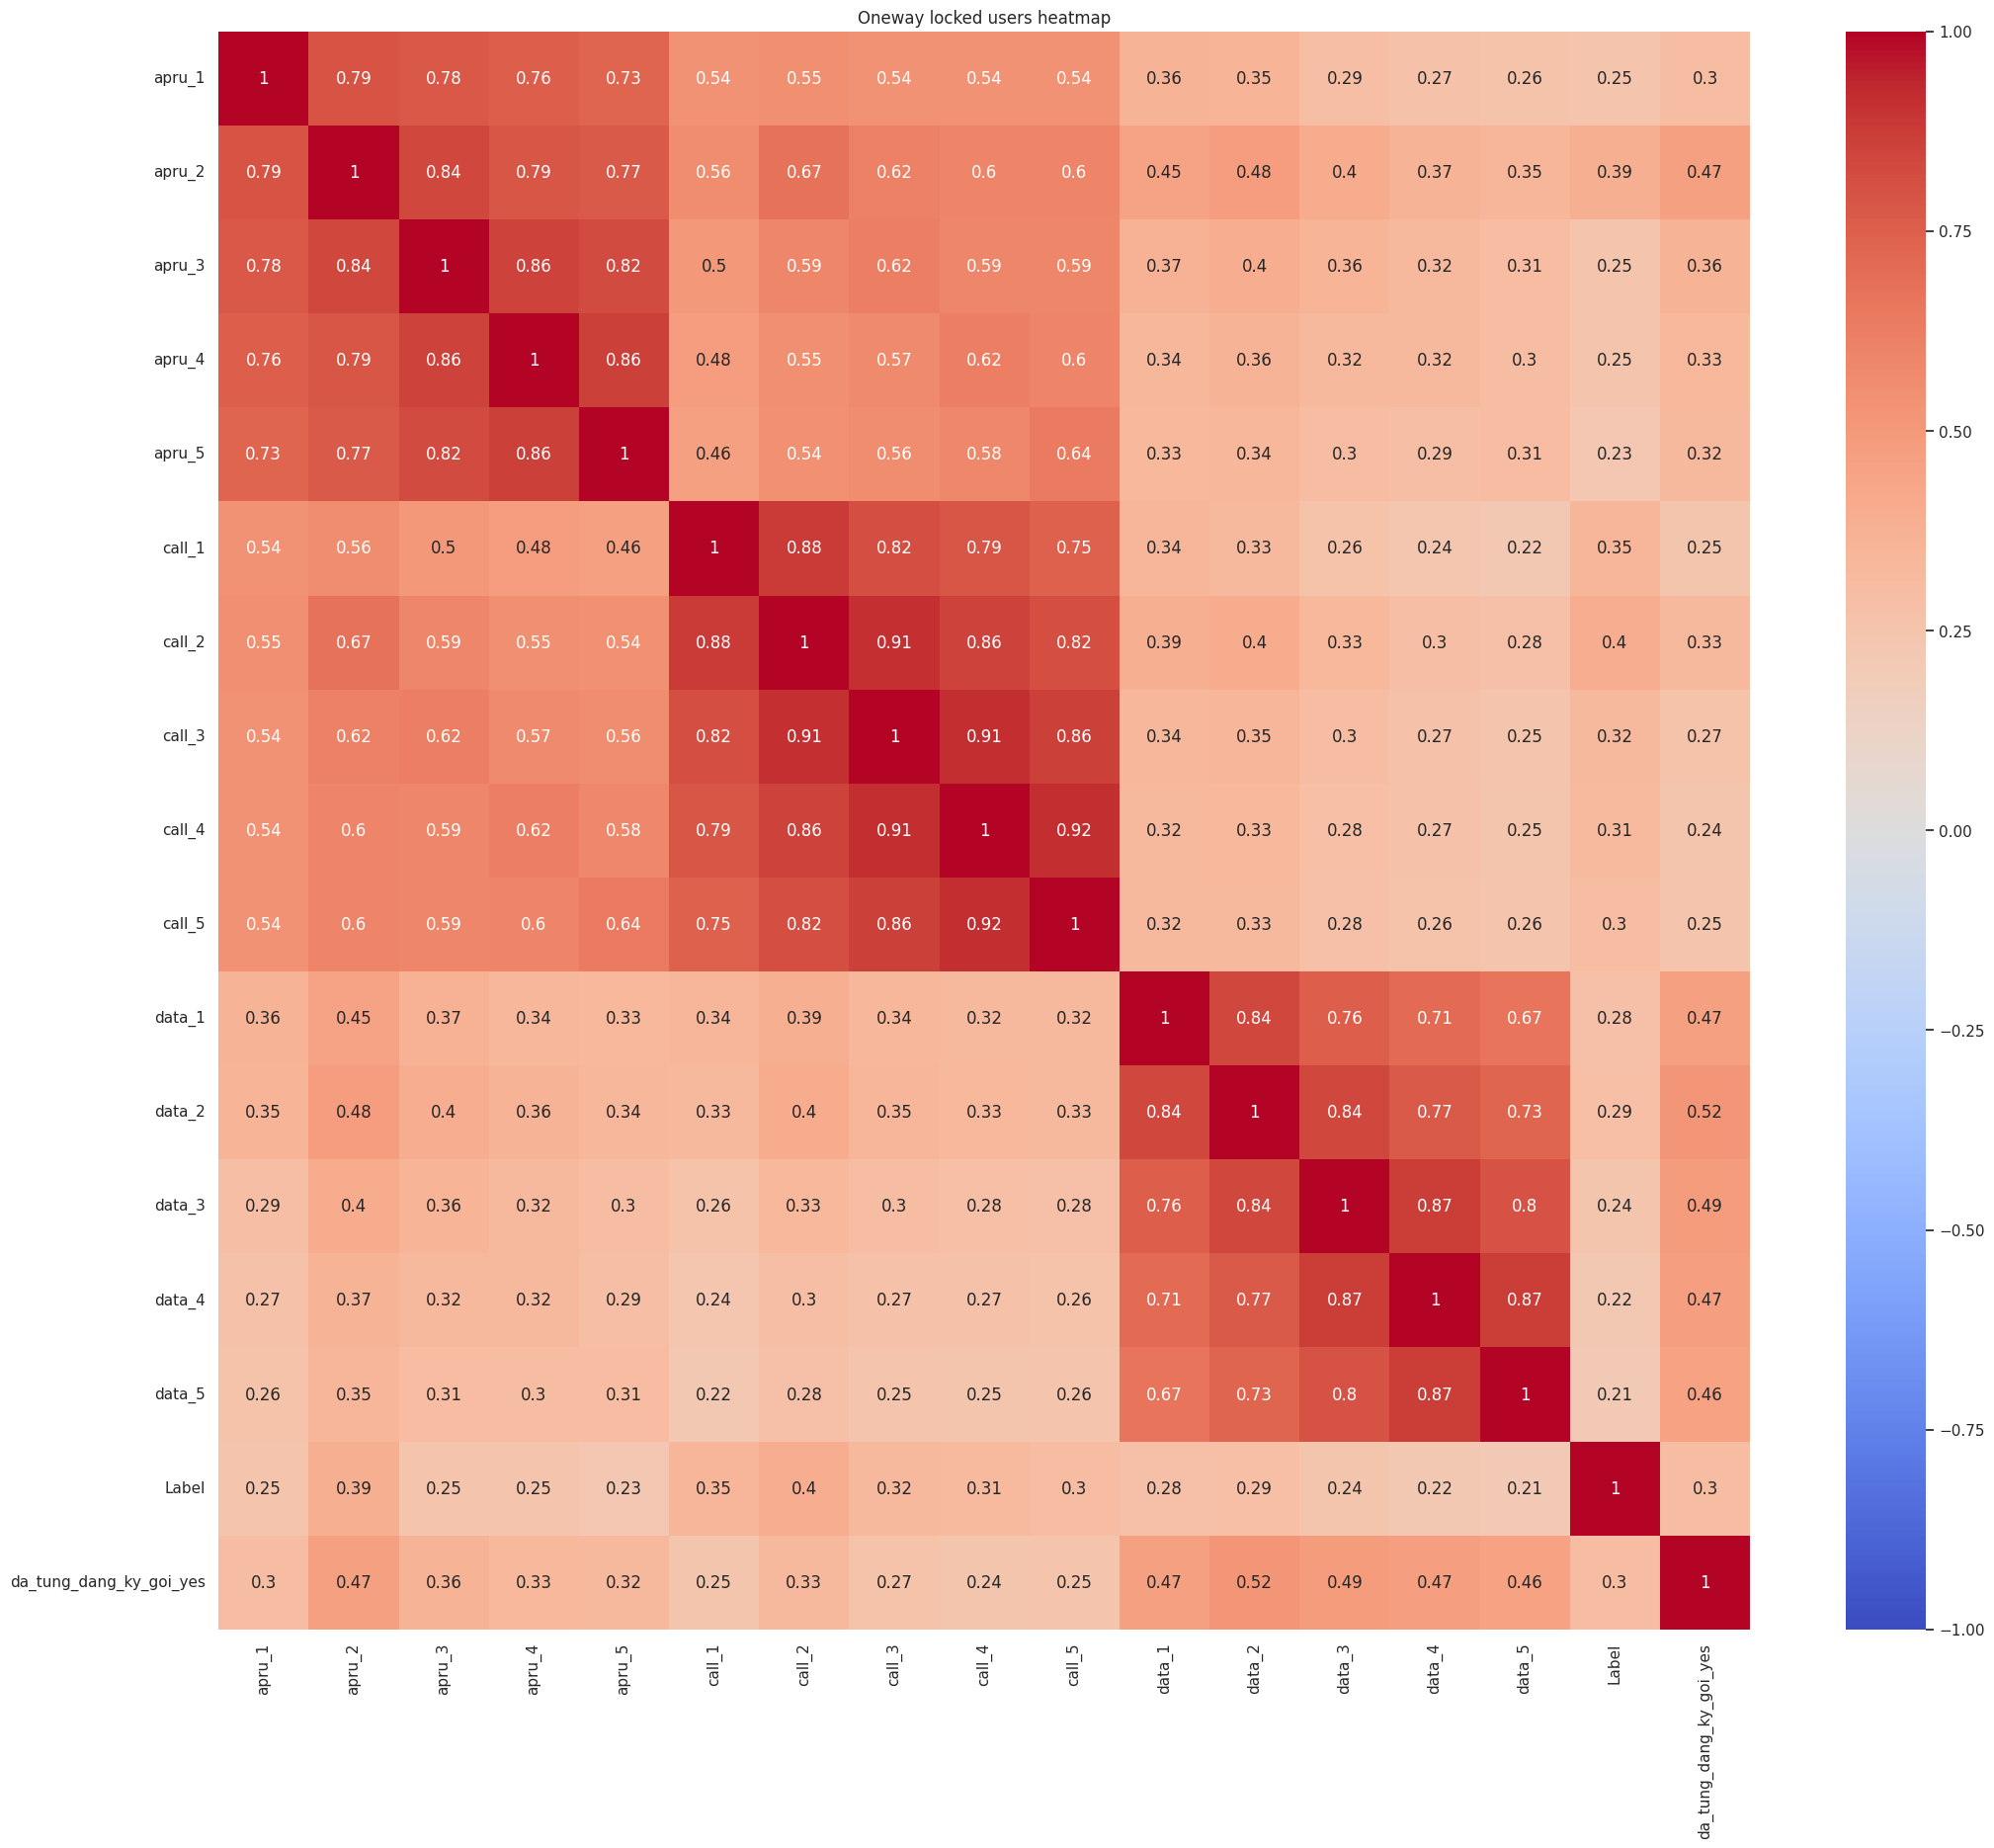

In [21]:
sns.set(style="white")
plt.figure(figsize=(25, 21))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Oneway locked users heatmap")
plt.show()

## 6. Prediction


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline


In [ ]:
X = data.drop('Label', axis=1) 
y = data['Label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:55:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n")

evaluate_model('Random Forest', y_test, rf_predictions)

evaluate_model('XGBoost', y_test, xgb_predictions)


Evaluation Metrics for Random Forest:
Accuracy: 0.7934
Precision: 0.8028
Recall: 0.8782
F1-Score: 0.8388
ROC-AUC: 0.7690
Confusion Matrix:
[[25406 13104]
 [ 7398 53348]]

Evaluation Metrics for XGBoost:
Accuracy: 0.7892
Precision: 0.8029
Recall: 0.8690
F1-Score: 0.8346
ROC-AUC: 0.7662
Confusion Matrix:
[[25549 12961]
 [ 7960 52786]]



## 7. Fill với 0


In [ ]:
import pandas as pd

columns_to_fill = [
    'apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5',
    'data_1', 'data_2', 'data_3', 'data_4','data_5',
    'call_1', 'call_2', 'call_3', 'call_4','call_5'
]

df_filled2 = df_cleaned.copy()

for col in columns_to_fill:
    df_filled2[col].fillna(0, inplace=True) 

df_encoded2 = pd.get_dummies(df_filled2, columns=['da_tung_dang_ky_goi'], drop_first=True)
data2=df_encoded2.drop(columns=['sdt_mahoa','ngay_khoa','ngay_mo_date','ngay_mo_khoa','danh_sach_goi_dang_ky','total_arpu','total_data','total_call'])

In [ ]:
X = data2.drop('Label', axis=1) 
y = data2['Label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:06:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [31]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n")


evaluate_model('Random Forest', y_test, rf_predictions)

evaluate_model('XGBoost', y_test, xgb_predictions)

Evaluation Metrics for Random Forest:
Accuracy: 0.7775
Precision: 0.8062
Recall: 0.8379
F1-Score: 0.8218
ROC-AUC: 0.7601
Confusion Matrix:
[[26278 12232]
 [ 9848 50898]]

Evaluation Metrics for XGBoost:
Accuracy: 0.7744
Precision: 0.8081
Recall: 0.8279
F1-Score: 0.8179
ROC-AUC: 0.7589
Confusion Matrix:
[[26570 11940]
 [10456 50290]]

